In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
# import plotly.express as px
import numpy.polynomial.polynomial as poly

In [2]:
# VDV - Kaina, rida, amžius, variklio galia/tūris
# eletrinis - kaina, rida, amžius, baterijos talpa, atstumas

# Bendri parametrai - markė, modelis, mechaninė/automatinė, kėbulo tipas, kuras, varantieji ratai(2 ar 4x4)

# 1. Pasidaryti vienai markei ir pabandyti pritaikyti įvairius kriterijus

# Bendrieji parametrai nufiltruos dataframą
# surasti skaitinius parametrus kurie koreliuoja, tada jiems pritaikyti fn_fit funkcijas,
# surasti ir išvesti vidurkį.

In [3]:
SDB = sqlite3.connect('../../DATA/WEBscr.db')
C = SDB.cursor()

sql1="""select * from TAutos;"""
df1 = pd.read_sql_query(sql1, con=SDB)

sql2="""select * from TUrl;"""
df2 = pd.read_sql_query(sql2, con=SDB)

SDB.close()


In [4]:
print(df1.columns)
print(df2.columns)

Index(['id', 'gamintojas', 'Pirma registracija', 'Kuro tipas', 'Kėbulo tipas',
       'Durų skaičius', 'Pavarų dėžė', 'id_', 'auto', 'Rida',
       'Taršos mokestis', 'Variklis', 'Elektra nuvažiuojamas atstumas',
       'Tech. apžiūra iki', 'Baterijos talpa, kWh', 'Spalva',
       'Bendroji masė, kg', 'Varantieji ratai', 'Klimato valdymas',
       'Ratlankių skersmuo', 'Nuosava masė, kg', 'Sėdimų vietų skaičius',
       'Pirmosios registracijos šalis', 'Kėbulo numeris (VIN)',
       'Euro standartas', 'CO₂ emisija, g/km', 'Defektai', 'Pagaminimo data',
       'Vairo padėtis', 'Registracijos data', 'Ilgis', 'Aukštis'],
      dtype='object')
Index(['id', 'url', 'name', 'params'], dtype='object')


In [5]:
df_with_dubs = pd.merge(df1, df2, on='id', how='inner')
df = df_with_dubs.drop_duplicates()
df.head()

,id,gamintojas,Pirma registracija,Kuro tipas,Kėbulo tipas,Durų skaičius,Pavarų dėžė,id_,auto,Rida,...,"CO₂ emisija, g/km",Defektai,Pagaminimo data,Vairo padėtis,Registracijos data,Ilgis,Aukštis,url,name,params
0,26564780,-Kita-,2008-09,Dyzelinas,Krovininis mikroautobusas,Kita,Mechaninė,Skelbimo ID: A26564780,"-Kita- -kita-, krovininis mikroautobusas",None,...,None,None,None,None,None,None,None,https://autoplius.lt/skelbimai/kita-kita-krovi...,-Kita-,-Kita- -kita-;2008-09;Krovininis mikroautobusa...
1,25881234,-Kita-,2011,Elektra,Sedanas,2/3,None,Skelbimo ID: A25881234,"-Kita- -kita-, sedanas",10 km,...,None,None,None,None,None,None,None,https://autoplius.lt/skelbimai/kita-kita-sedan...,-Kita-,-Kita- -kita-;2011;Sedanas;Elektra;Automatinė;...
2,26631227,-Kita-,2020-02,Elektra,Hečbekas,2/3,None,Skelbimo ID: A26631227,"-Kita- -kita-, hečbekas",14 000 km,...,None,None,None,None,None,None,None,https://autoplius.lt/skelbimai/kita-kita-hecbe...,-Kita-,-Kita- -kita-;2020-02;Hečbekas;Elektra;Automat...
3,26331698,-Kita-,2024,Elektra,Krovininis mikroautobusas,4/5,None,Skelbimo ID: A26331698,"-Kita- -kita-, 41 kWh, krovininis mikroautobusas",None,...,None,None,None,None,None,None,None,https://autoplius.lt/skelbimai/kita-kita-41-kw...,-Kita-,-Kita- -kita-;2024;Krovininis mikroautobusas;E...
4,25604691,Abarth,2017,Benzinas,Kabrioletas,2/3,Mechaninė,Skelbimo ID: A25604691,"Abarth 124 Spider, 1.4 l., kabrioletas",75 000 km,...,148 g/km,None,None,None,None,None,None,https://autoplius.lt/skelbimai/abarth-124-spid...,Abarth,Abarth 124 Spider;2017;Kabrioletas;Benzinas;Me...


In [6]:
df.columns

Index(['id', 'gamintojas', 'Pirma registracija', 'Kuro tipas', 'Kėbulo tipas',
       'Durų skaičius', 'Pavarų dėžė', 'id_', 'auto', 'Rida',
       'Taršos mokestis', 'Variklis', 'Elektra nuvažiuojamas atstumas',
       'Tech. apžiūra iki', 'Baterijos talpa, kWh', 'Spalva',
       'Bendroji masė, kg', 'Varantieji ratai', 'Klimato valdymas',
       'Ratlankių skersmuo', 'Nuosava masė, kg', 'Sėdimų vietų skaičius',
       'Pirmosios registracijos šalis', 'Kėbulo numeris (VIN)',
       'Euro standartas', 'CO₂ emisija, g/km', 'Defektai', 'Pagaminimo data',
       'Vairo padėtis', 'Registracijos data', 'Ilgis', 'Aukštis', 'url',
       'name', 'params'],
      dtype='object')

In [7]:
gamintojai = sorted(list(set(df['gamintojas'].tolist())))

print(gamintojai)

['-Kita-', 'Abarth', 'Acura', 'Aiways', 'Aixam', 'Alfa Romeo', 'Alpina', 'Aston Martin', 'Audi', 'Austin Rover', 'Austin-Healey', 'BMW', 'BYD', 'Bentley', 'Bolloré', 'Buick', 'Cadillac', 'Cenntro', 'Chevrolet', 'Chrysler', 'Citroen', 'Cupra', 'DS Automobiles', 'Dacia', 'Daihatsu', 'Dodge', 'Ferrari', 'Fiat', 'Ford', 'GAZ', 'GMC', 'GWM', 'Great Wall', 'Honda', 'Hudson', 'Hummer', 'Hyundai', 'Ineos', 'Infiniti', 'Isuzu', 'Iveco', 'Jaguar', 'Jeep', 'KGM', 'Kia', 'LDV', 'Lada', 'Lamborghini', 'Lancia', 'Land Rover', 'Lexus', 'Ligier', 'Lincoln', 'LuAZ', 'Lucid', 'Lynk & Co', 'MAN', 'MG', 'Maserati', 'Maxus', 'Maybach', 'Mazda', 'Mercedes-Benz', 'Mercury', 'Microcar', 'Mini', 'Mitsubishi', 'Moskvich', 'NIO', 'Nissan', 'Opel', 'Panther', 'Paxster', 'Peugeot', 'Plymouth', 'Polestar', 'Pontiac', 'Porsche', 'Renault', 'Rolls-Royce', 'Rover', 'Saab', 'Scion', 'Seat', 'Seres', 'Skoda', 'Smart', 'SsangYong', 'Subaru', 'Suzuki', 'Tatra', 'Tazzari', 'Tesla', 'Toyota', 'Triumph', 'UAZ', 'Vauxhall', '

In [10]:
gamintojai_kiekiai =df['gamintojas'].value_counts()
g = gamintojai_kiekiai[gamintojai_kiekiai.values >= 10]
gamintojai = sorted(list(g.index))

kuro_tipai = sorted(list(set(df['Kuro tipas'].tolist())))

pavaros =list(set(df['Pavarų dėžė'].tolist()))

kebulo_tipai = sorted(list(set(df[df['Kėbulo tipas'].notna()]['Kėbulo tipas'].tolist())))
amziai = sorted(list(set(df[df['amzius'].notna()]['amzius'].tolist())))
print(amziai)

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 70.0, 71.0, 76.0, 85.0, 87.0, 88.0, 94.0, 96.0]


In [9]:
def get_kaina(x):
    kaina = x.split(';')[-1].split('\n')[0].replace(' ', '').replace('€', '')
    return int(kaina)

df['kaina'] = df['params'].apply(get_kaina)

def amzius(x):
    if x != None:
        return int(2024 - int(x[:4]))
    
df['amzius'] = df['Pirma registracija'].apply(amzius)

def rida(x):
    if x != None:
        return int(x.replace(' ', '').replace('km', ''))
    else:
        return np.nan
    
df['rida'] = df['Rida'].apply(rida)


def galia(x):
    if x != None:
        if 'kW' in x:
            return int(x.split('(')[-1][:-3])
    else:
        return np.nan

df['galia'] = df['Variklis'].apply(galia)    

def baterija(x):
    if x != None:
        return int(x.replace(' ', '').replace('kWh', ''))
    
df['baterija'] = df['Baterijos talpa, kWh'].apply(baterija)  


def eatstumas(x):
    if x != None:
        return int(x.replace(' ', '').replace('km', ''))
    
df['eatstumas'] = df['Elektra nuvažiuojamas atstumas'].apply(eatstumas)

df['R5000'] = df[df['rida'] != None]['rida'].apply(lambda x: float(np.ceil(x/5000) * 5000))
df['ea50'] = df[df['eatstumas'] != None]['eatstumas'].apply(lambda x: float(np.ceil(x/50) * 50))
df.head()

,id,gamintojas,Pirma registracija,Kuro tipas,Kėbulo tipas,Durų skaičius,Pavarų dėžė,id_,auto,Rida,...,name,params,kaina,amzius,rida,galia,baterija,eatstumas,R5000,ea50
0,26564780,-Kita-,2008-09,Dyzelinas,Krovininis mikroautobusas,Kita,Mechaninė,Skelbimo ID: A26564780,"-Kita- -kita-, krovininis mikroautobusas",None,...,-Kita-,-Kita- -kita-;2008-09;Krovininis mikroautobusa...,1750,16.0,NaN,NaN,NaN,NaN,NaN,NaN
1,25881234,-Kita-,2011,Elektra,Sedanas,2/3,None,Skelbimo ID: A25881234,"-Kita- -kita-, sedanas",10 km,...,-Kita-,-Kita- -kita-;2011;Sedanas;Elektra;Automatinė;...,3900,13.0,10.0,NaN,NaN,NaN,5000.0,NaN
2,26631227,-Kita-,2020-02,Elektra,Hečbekas,2/3,None,Skelbimo ID: A26631227,"-Kita- -kita-, hečbekas",14 000 km,...,-Kita-,-Kita- -kita-;2020-02;Hečbekas;Elektra;Automat...,6800,4.0,14000.0,29.0,NaN,150.0,15000.0,150.0
3,26331698,-Kita-,2024,Elektra,Krovininis mikroautobusas,4/5,None,Skelbimo ID: A26331698,"-Kita- -kita-, 41 kWh, krovininis mikroautobusas",None,...,-Kita-,-Kita- -kita-;2024;Krovininis mikroautobusas;E...,60500,0.0,NaN,66.0,41.0,200.0,NaN,200.0
4,25604691,Abarth,2017,Benzinas,Kabrioletas,2/3,Mechaninė,Skelbimo ID: A25604691,"Abarth 124 Spider, 1.4 l., kabrioletas",75 000 km,...,Abarth,Abarth 124 Spider;2017;Kabrioletas;Benzinas;Me...,18900,7.0,75000.0,125.0,NaN,NaN,75000.0,NaN


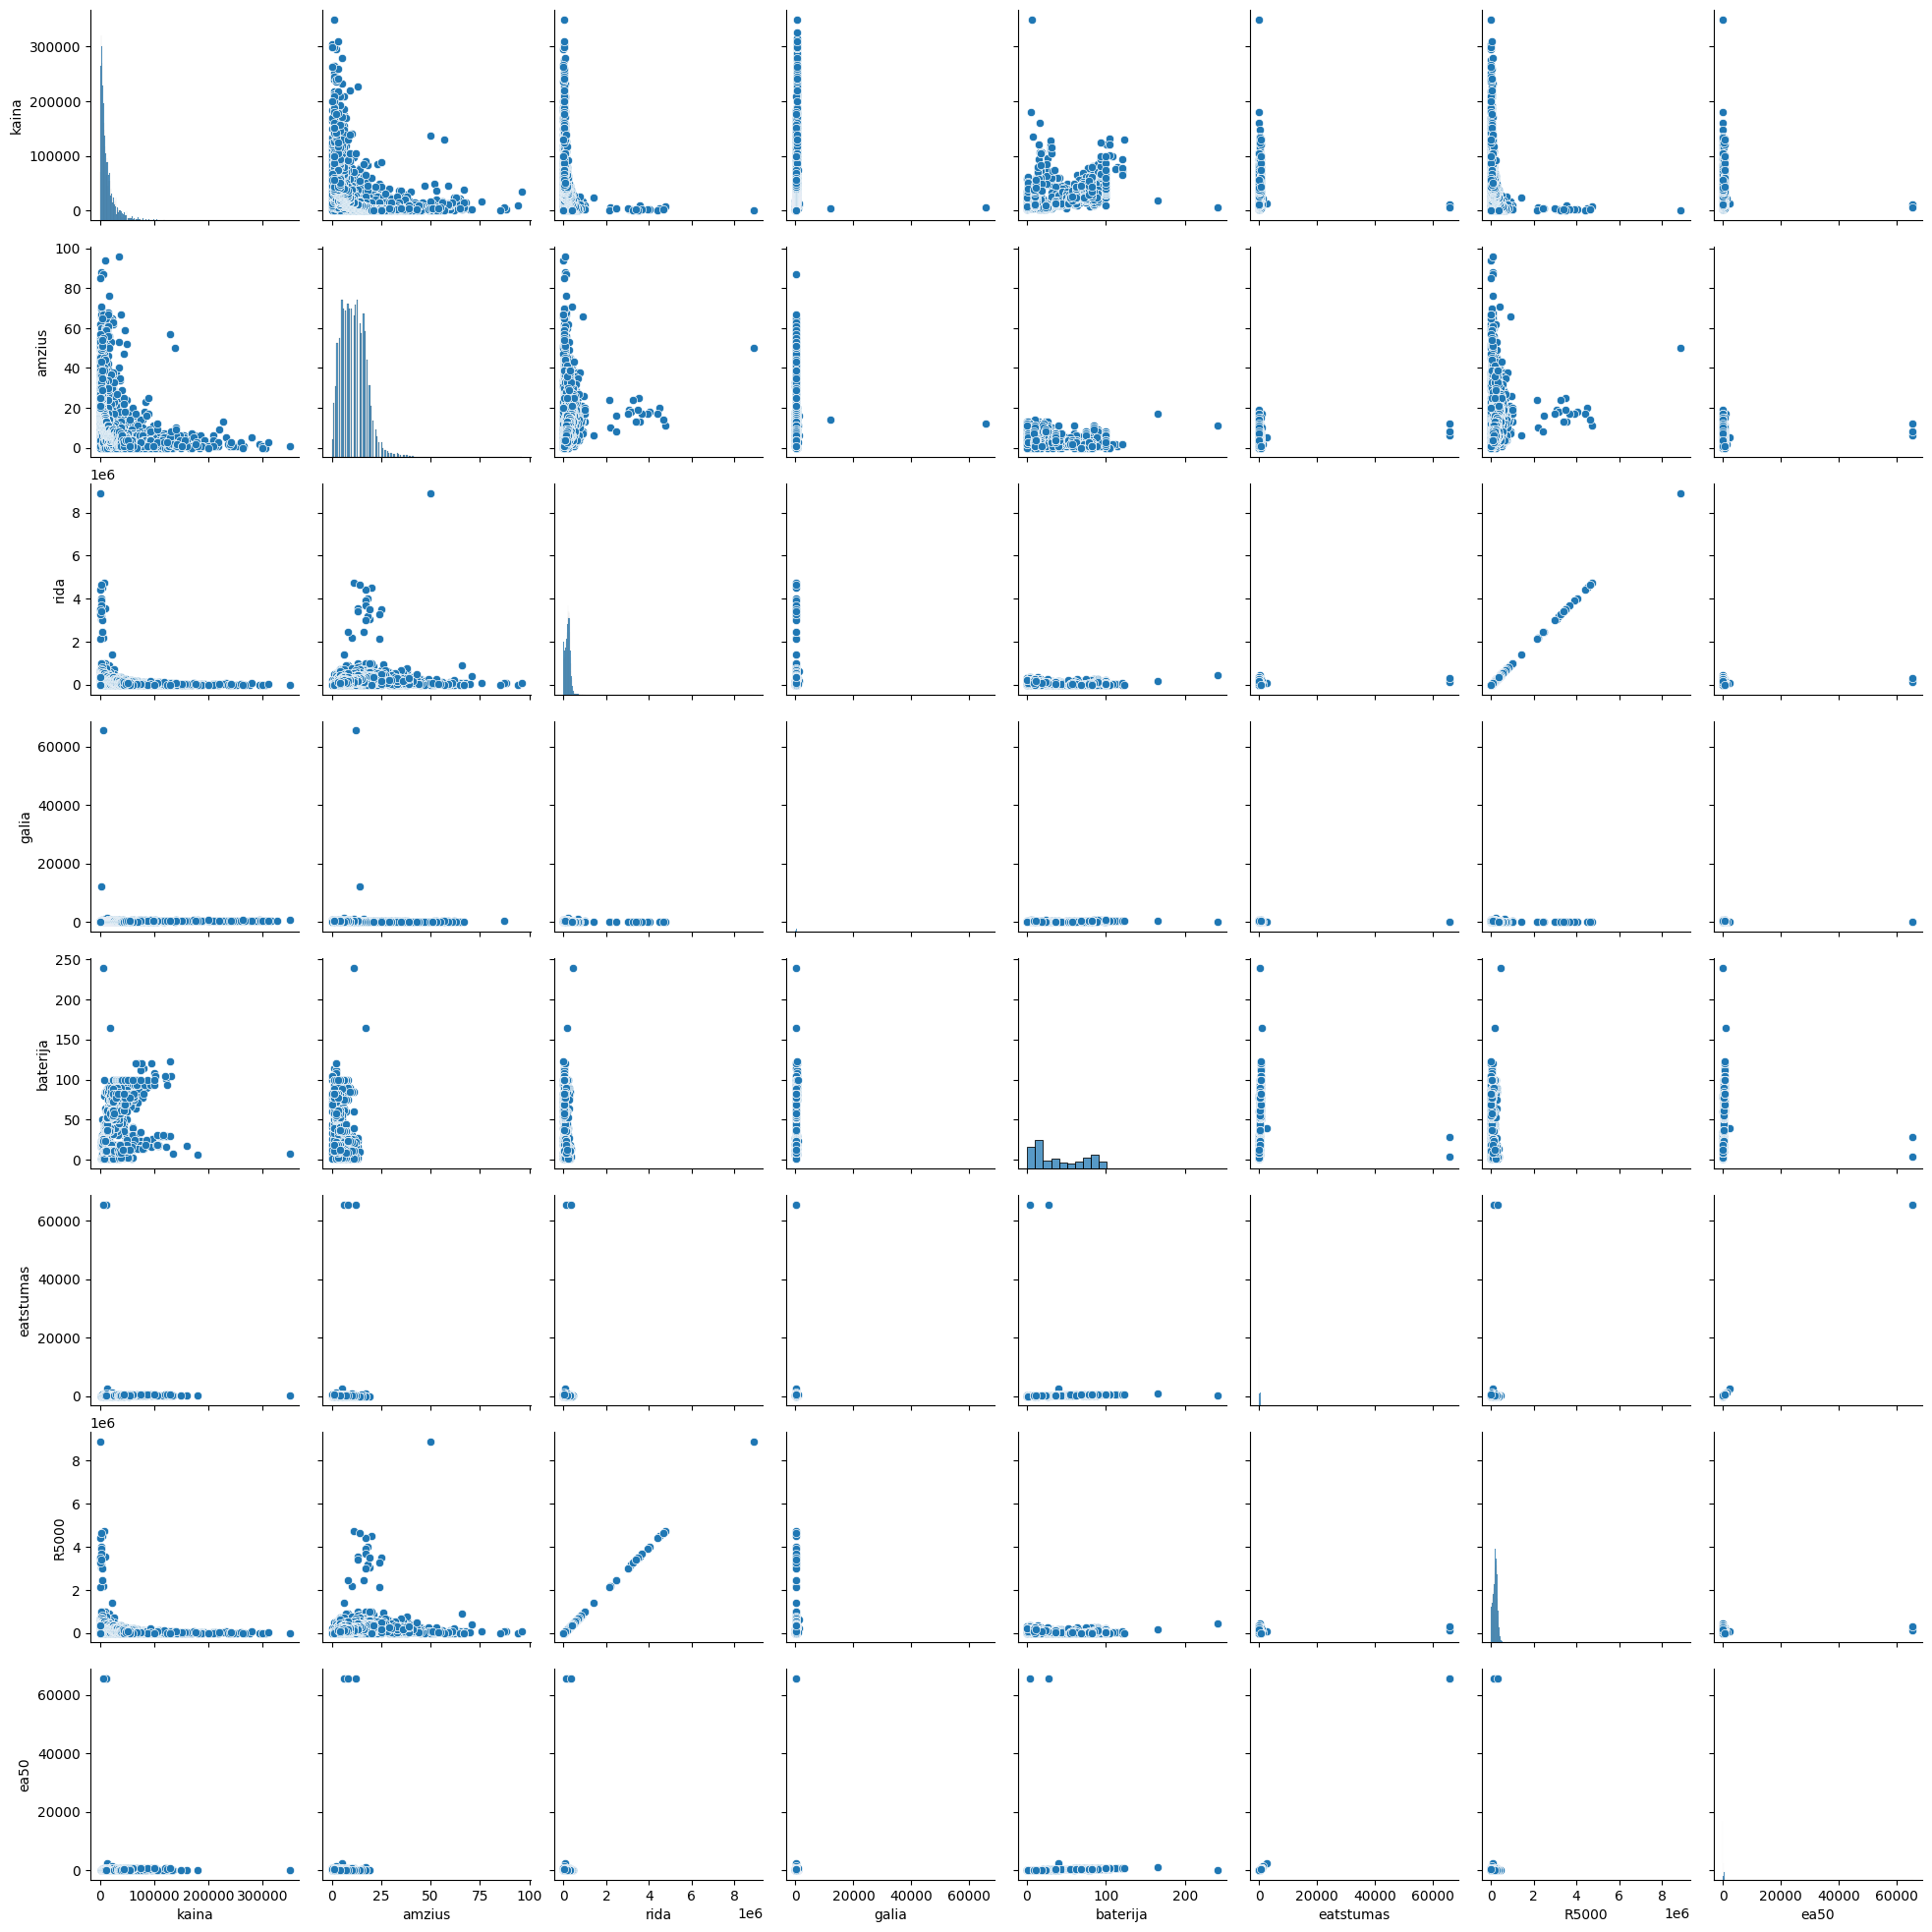

In [11]:
sns.pairplot(data=df)

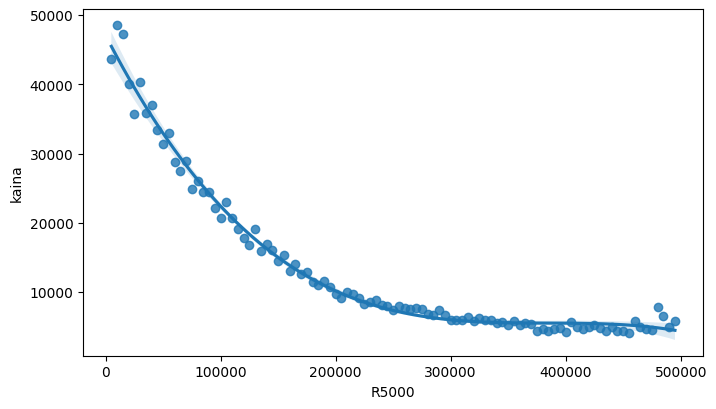

In [12]:
df_rida = df[['kaina', 'R5000']]
df_rida.dropna(inplace=True)
df_rida_gr = df_rida.groupby('R5000').mean(numeric_only=True).reset_index()

df_rida_gr2 = df_rida_gr[df_rida_gr['R5000'] < 500000]

fig, axis = plt.subplots(figsize=(8, 4.5))
sns.regplot(data=df_rida_gr2, x='R5000', y='kaina', order=3)
# axis.axhline(y=0)
plt.show()

In [13]:
coef = np.polyfit(x=df_rida_gr2['R5000'], y=df_rida_gr2['kaina'], deg=3) # grazina koeficientas is desines i kaire
print(coef)
rida_fit = poly.Polynomial(coef[::-1]) # pasiradem funkcija

r = 300000
rida_t_kaina = rida_fit(r)
print(rida_t_kaina)

[-7.28482141e-13  8.39889914e-07 -3.23236327e-01  4.70656600e+04]
6015.836400529144


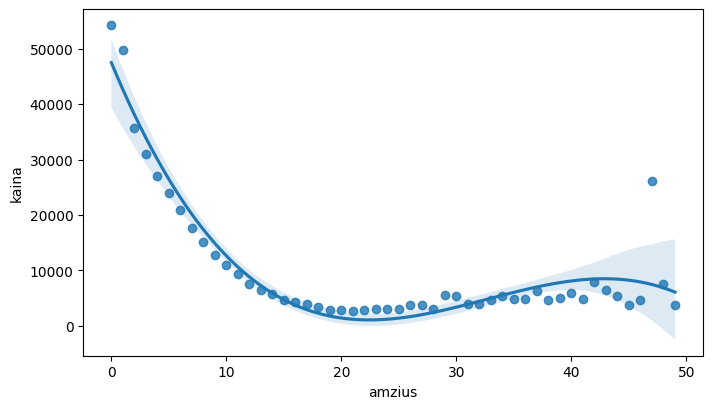

[-1.74035953e+00  1.70417811e+02 -5.01721337e+03  4.74947985e+04]
4706.891915015251


In [14]:
df_amzius = df[['kaina', 'amzius']]
df_amzius.dropna(inplace=True)
df_amzius_gr = df_amzius.groupby('amzius').mean(numeric_only=True).reset_index()

df_amzius_gr2 = df_amzius_gr[df_amzius_gr['amzius'] < 50]

fig, axis = plt.subplots(figsize=(8, 4.5))
sns.regplot(data=df_amzius_gr2, x='amzius', y='kaina', order=3)
# axis.axhline(y=0)
plt.show()


coef = np.polyfit(x=df_amzius_gr2['amzius'], y=df_amzius_gr2['kaina'], deg=3) # grazina koeficientas is desines i kaire
print(coef)
amzius_fit = poly.Polynomial(coef[::-1]) # pasiradem funkcija

a = 15
amzius_t_kaina = amzius_fit(a)
print(amzius_t_kaina)

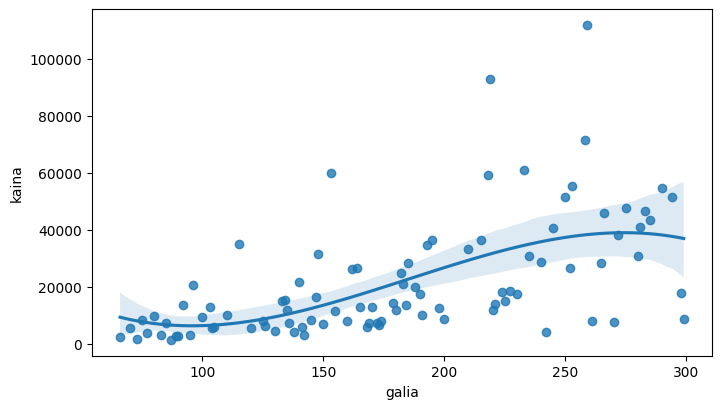

[-1.14527790e-02  6.35752560e+00 -9.02253903e+02  4.45041155e+04]
11369.645318085124


In [15]:
# df_galia = df[(df['gamintojas'] == 'BMW') & (df['amzius'] == 5) & (df['R5000'] == 160000)][['kaina', 'galia']]
df_galia = df[(df['gamintojas'] == 'BMW')][['kaina', 'galia']]
df_galia.dropna(inplace=True)
df_galia_gr = df_galia.groupby('galia').mean(numeric_only=True).reset_index()

# df_galia_gr2 = df_galia_gr
df_galia_gr2 = df_galia_gr[df_galia_gr['galia'] < 300]

fig, axis = plt.subplots(figsize=(8, 4.5))
sns.regplot(data=df_galia_gr2, x='galia', y='kaina', order=3)
# axis.axhline(y=0)
plt.show()


coef = np.polyfit(x=df_galia_gr2['galia'], y=df_galia_gr2['kaina'], deg=3) # grazina koeficientas is desines i kaire
print(coef)
galia_fit = poly.Polynomial(coef[::-1]) # pasiradem funkcija

g = 140
galia_t_kaina = galia_fit(g)
print(galia_t_kaina)

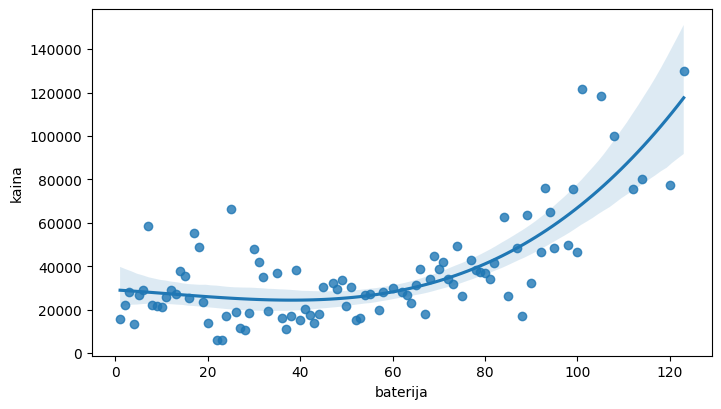

[ 7.89600433e-02 -2.79073408e+00 -1.31924644e+02  2.91036509e+04]
41116.5234151229


In [16]:
df_baterija = df[['kaina', 'baterija']]
df_baterija.dropna(inplace=True)
df_baterija_gr = df_baterija.groupby('baterija').mean(numeric_only=True).reset_index()

# df_baterija_gr2 = df_baterija_gr
df_baterija_gr2 = df_baterija_gr[df_baterija_gr['baterija'] < 150]

fig, axis = plt.subplots(figsize=(8, 4.5))
sns.regplot(data=df_baterija_gr2, x='baterija', y='kaina', order=3)
# axis.axhline(y=0)
plt.show()


coef = np.polyfit(x=df_baterija_gr2['baterija'], y=df_baterija_gr2['kaina'], deg=3) # grazina koeficientas is desines i kaire
print(coef)
baterija_fit = poly.Polynomial(coef[::-1]) # pasiradem funkcija

b = 80
baterija_t_kaina = baterija_fit(b)
print(baterija_t_kaina)

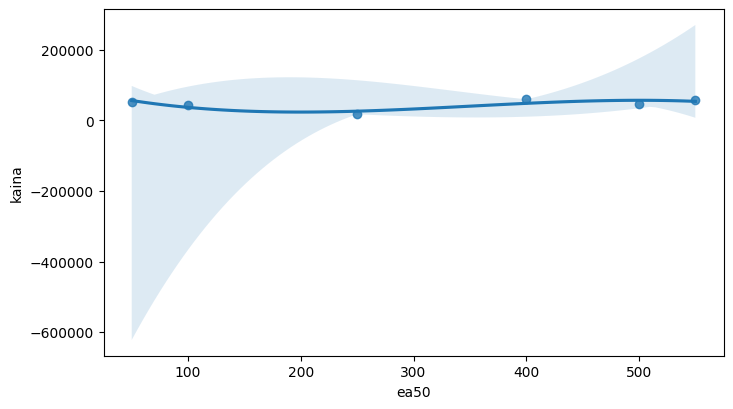

[-2.44538601e-03  2.56646161e+00 -7.31640175e+02  8.70279707e+04]
57150.03466958625


In [17]:
df_eatstumas = df[(df['gamintojas'] == 'BMW') & (df['amzius'] == 2)][['kaina', 'ea50']]
df_eatstumas.dropna(inplace=True)
df_eatstumas_gr = df_eatstumas.groupby('ea50').mean(numeric_only=True).reset_index()

# df_eatstumas_gr2 = df_eatstumas_gr
df_eatstumas_gr2 = df_eatstumas_gr[df_eatstumas_gr['ea50'] < 700]

fig, axis = plt.subplots(figsize=(8, 4.5))
sns.regplot(data=df_eatstumas_gr2, x='ea50', y='kaina', order=3)
# axis.axhline(y=0)
plt.show()


coef = np.polyfit(x=df_eatstumas_gr2['ea50'], y=df_eatstumas_gr2['kaina'], deg=3) # grazina koeficientas is desines i kaire
print(coef)
eatstumas_fit = poly.Polynomial(coef[::-1]) # pasiradem funkcija

b = 500
eatstumas_t_kaina = eatstumas_fit(b)
print(eatstumas_t_kaina)

In [89]:
kiek_auto = df[(df['gamintojas'] == 'Alfa Romeo') & (df['amzius'] == 4)][['gamintojas']].count()
if kiek_auto.values > 10:
    print('labai gerai')
    print(kiek_auto.values)
else:
    print('per mazai')
    print(kiek_auto.values)

per mazai
[5]


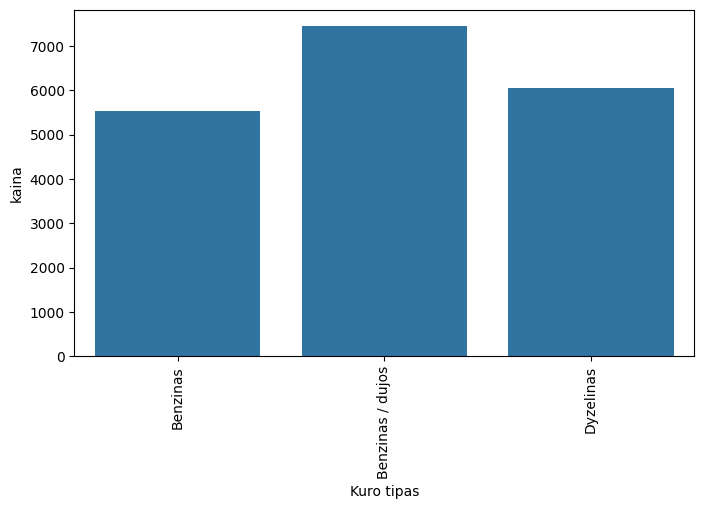

In [46]:
df_kuras = df[(df['gamintojas'] == 'BMW') & (df['amzius'] == 15)][['kaina', 'Kuro tipas']]
df_kuras.dropna(inplace=True)
df_kuras_gr = df_kuras.groupby('Kuro tipas').mean(numeric_only=True).reset_index()

df_kuras_gr2 = df_kuras_gr
# df_kuras_gr2 = df_kuras_gr[df_kuras_gr['baterija'] < 150]

fig, axis = plt.subplots(figsize=(8, 4.5))
sns.barplot(data=df_kuras_gr2, x='Kuro tipas', y='kaina')
axis.tick_params(axis='x', rotation=90)
# axis.axhline(y=0)
plt.show()


# coef = np.polyfit(x=df_baterija_gr2['baterija'], y=df_baterija_gr2['kaina'], deg=3) # grazina koeficientas is desines i kaire
# print(coef)
# baterija_fit = poly.Polynomial(coef[::-1]) # pasiradem funkcija

# b = 80
# baterija_t_kaina = baterija_fit(b)
# print(baterija_t_kaina)

In [94]:
gamintojas = 'Mercedes-Benz'
amzius = 2
rida= 50000
kuras= 'Benzinas'
pavara = 'Automatinė'
kebulas = 'Komercinis'

df_rida = df[(df['gamintojas'] == gamintojas) & (df['amzius'] == amzius)][['kaina', 'R5000']]
df_rida.dropna(inplace=True)
df_rida_gr = df_rida.groupby('R5000').mean(numeric_only=True).reset_index()
df_rida_gr2 = df_rida_gr[df_rida_gr['R5000'] < 500000]
coef = np.polyfit(x=df_rida_gr2['R5000'], y=df_rida_gr2['kaina'], deg=3) # grazina koeficientas is desines i kaire
rida_fit = poly.Polynomial(coef[::-1]) # pasiradem funkcija
rida_t_kaina = rida_fit(rida)

df_kuras = df[(df['gamintojas'] == gamintojas) & (df['amzius'] == amzius) & (df['Kuro tipas'] == kuras)][['kaina', 'Kuro tipas']]
df_kuras_gr = df_kuras.groupby('Kuro tipas').mean(numeric_only=True).reset_index()
df_kuras_gr
kuras_t_kaina = df_kuras_gr.iloc[0, 1]

df_pavara = df[(df['gamintojas'] == gamintojas) & (df['amzius'] == amzius) & (df['Pavarų dėžė'] == pavara)][['kaina', 'Pavarų dėžė']]
df_pavara_gr = df_pavara.groupby('Pavarų dėžė').mean(numeric_only=True).reset_index()
pavara_t_kaina = df_pavara_gr.iloc[0, 1]

# df_kebulas = df[(df['gamintojas'] == gamintojas) & (df['amzius'] == amzius) & (df['Kėbulo tipas'] == kebulas)][['kaina', 'Kėbulo tipas']]
df_kebulas = df[(df['gamintojas'] == gamintojas) & (df['amzius'] == amzius)][['kaina', 'Kėbulo tipas']]
df_kebulas_gr = df_kebulas.groupby('Kėbulo tipas').mean(numeric_only=True).reset_index()
df_kebulas_gr
# kebulas_t_kaina = df_kebulas_gr.iloc[0, 1]

# t_kaina = round(sum([rida_t_kaina, kuras_t_kaina, pavara_t_kaina, kebulas_t_kaina]) / 4)

# print(f'Rida kaina {rida_t_kaina}')
# print(f'kuras kaina {kuras_t_kaina}')
# print(f'pavara kaina {pavara_t_kaina}')
# print(f'kebulas kaina {kebulas_t_kaina}')
# print(f'tiketina kaina {t_kaina}')

,Kėbulo tipas,kaina
0,Hečbekas,58681.666667
1,Keleivinis mikroautobusas,60281.333333
2,Komercinis,13850.000000
3,Krovininis mikroautobusas,27671.250000
4,Kupė (Coupe),65499.500000
5,Limuzinas,131500.000000
6,Sedanas,57110.238095
7,Universalas,35621.125000
8,Vienatūris,52075.000000
9,Visureigis / Krosoveris,59452.392857


In [75]:
gamintojai= 'Aixam'
kebulo_tipai = ['--pasirinkite--'] + sorted(list(set(df[(df['Pavarų dėžė'].notna()) & (df['gamintojas'] == gamintojai)]['Pavarų dėžė'].tolist())))
print(kebulo_tipai)

['--pasirinkite--', 'Automatinė']
